In [8]:
# %pip install pandas
# %pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.utils import shuffle
import random
import math
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [64]:
# Generate Random Campaings
# df = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/GoogleAds.xlsx')
# df = shuffle(df)
# df = df.dropna()
# df = df.reset_index(drop=True)
# df.to_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/RandomCampaigns.xlsx', index=False)

# Random Campaigns
df = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/RandomCampaigns.xlsx')
# clicks = random.randrange(0, 40)
# impressions = random.randrange(100, 2000)
# cost = random.uniform(0, 60)
# ctr = clicks/impressions * 100
# score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100

# for i in df.index:
#     clicks = random.randrange(0, 40)
#     impressions = random.randrange(100, 2000)
#     cost = random.uniform(0, 60)
#     ctr = clicks/impressions
#     # score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100
#     score = ((impressions/2000)*(1/3)+(clicks/40)*(1/3)+(ctr/0.4)*(1/3))

#     df.at[i,'clicks'] = clicks
#     df.at[i,'impressions'] = impressions
#     df.at[i,'cost'] = cost
#     df.at[i,'ctr'] = ctr
#     df.at[i,'score'] = score
    
# df.to_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/RandomCampaigns.xlsx', index=False)
display(df)
# print(clicks)
# print(impressions)
# print(cost)
# print(score)
# print(ctr)

,Keywords,Description,Headline,Location,Sitelink,Callout,Url,clicks,impressions,cost,ctr,score
0,project software,Project + Artwork Management Tool | 100% cloud...,Efficient Teamwork Starts Here,"USA, Canada",See Our Features\n\nD: Integrations - Automati...,Start in Minutes,https://twonas.com/services/ams/?source=genesis,13,981,3.883718,0.013252,0.282876
1,pm software,Free plans available. Integrate with your othe...,#1 Artwork Management Tool,"Australia, New Zealand","Free Plans Available\n\nD: Three Plans, All Co...",No Download Necessary,https://twonas.com/services/ams/why/?source=ge...,4,1655,58.415585,0.002417,0.311181
2,packaging design software,"Plan, Track, and Collaborate Using the Softwar...",Change The Way You Manage Art,"Norway, Sweden, Finland, Denmark, Iceland",Free Project Manager\n\nD: From Basic Projects...,For Teams of 3 and Up,https://twonas.com/services/ams/pricing/?sourc...,25,701,4.467889,0.035663,0.354886
3,workflow management software,Set for Success with Easy Integrations. Perfec...,Shape Your Workflow in Minutes,"Spain, France, Italy, Portugal",Free Workflow Manager\n\nD: Plans Built for Te...,Easy to Use,https://twonas.com/services/ams/contact/?sourc...,26,1917,53.195766,0.013563,0.547469
4,project plan tool,The Newest Tech in Artwork Management. Simple ...,Artwork Management Made Easy,"United Kingdom, Ireland",See Pricing\n\nD:See All of Our Plans and See ...,Free Plans Available,https://twonas.com/services/ams/features/?sour...,39,1304,22.014577,0.029908,0.567257


In [4]:
# Basic Hill Climbing Algorithm

def objective_function(campaign):
    clicks = random.randrange(0, 40)
    impressions = random.randrange(100, 2000)
    cost = random.uniform(0, 60)
    ctr = clicks/impressions * 100
    score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100

    # add bonus for the keyword 'packaging design software'
    if campaign.loc['Keywords'] == 'packaging design software':
        score += 10000

    campaign.loc['clicks'] = clicks
    campaign.loc['impressions'] = impressions
    campaign.loc['cost'] = cost
    campaign.loc['ctr'] = ctr
    campaign.loc['score'] = score

    return campaign
# Define the parameters to optimize
genericDf = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/GoogleAds.xlsx')

# convert DataFrame to sorted dictionary
parameters = dict(sorted(genericDf.to_dict(orient='list').items()))
# remove NaN values from dictionary
parameters = {k: [v for v in lst if pd.notnull(v)] for k, lst in parameters.items()}

current_solution = df.loc[1]
current_value = current_solution.loc['score']

iterations = 0
# Iteratively improve the solution
while True:
    iterations += 1
    print(current_solution)
    print('\n')
    # Generate a neighbor solution by making small adjustments to one or more parameters
    neighbor_solution = current_solution.copy()
    parameter_to_change = random.choice(list(parameters.keys()))

    print('Parameter to change: ' + parameter_to_change + '\n')
    
    neighbor_solution[parameter_to_change] = random.choice(parameters[parameter_to_change])
    neighbor_value = objective_function(neighbor_solution)
    
    # If the neighbor solution is better, accept it and continue iterating
    if neighbor_value.loc['score'] > current_value:
        current_solution = neighbor_solution
        current_value = neighbor_value.loc['score']
        
    else:
        break
        
# The final solution is the locally optimal configuration of the parameters
print("Number of iterations: " + str(iterations))

Keywords                                             pm software
Description    Free plans available. Integrate with your othe...
Headline                              #1 Artwork Management Tool
Location                                  Australia, New Zealand
Sitelink       Free Plans Available\n\nD: Three Plans, All Co...
Callout                                    No Download Necessary
Url            https://twonas.com/services/ams/why/?source=ge...
clicks                                                        20
impressions                                                  934
cost                                                   54.927843
ctr                                                     2.141328
score                                                 281.226558
Name: 1, dtype: object


Parameter to change: Headline

Number of iterations: 1


     Iteration         Score
0          NaN           NaN
1          NaN           NaN
2          1.0    281.226558
3          2.0   2551.708640
4          3.0   3194.701497
..         ...           ...
97        96.0  10019.979910
98        97.0  10019.979910
99        98.0  10019.979910
100       99.0  10019.979910
101      100.0  10019.979910

[102 rows x 2 columns]
Keywords                                             pm software
Description    Free plans available. Integrate with your othe...
Headline                              #1 Artwork Management Tool
Location                                  Australia, New Zealand
Sitelink       See Pricing\n\nD:See All of Our Plans and See ...
Callout                                              Easy to Use
Url            https://twonas.com/services/ams/why/?source=ge...
clicks                                                        37
impressions                                                  102
cost                                       

/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_10366/368106859.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_10366/368106859.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topology = topology.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_10366/368106859.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_10366/368106859.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

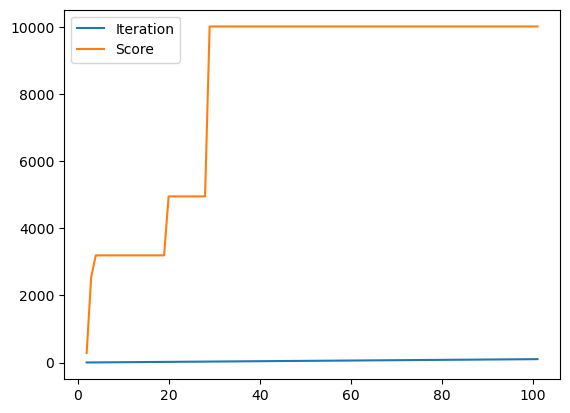

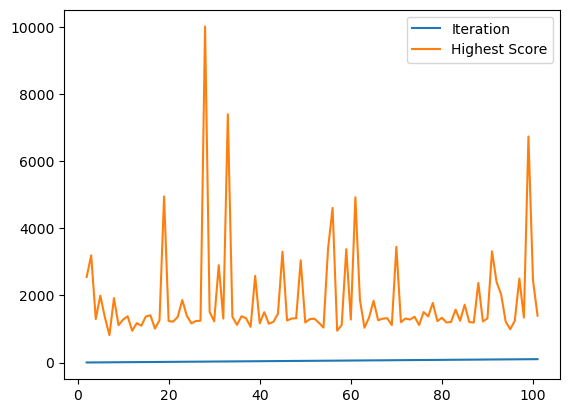

In [62]:
# Basic Hill Climbing Algorithm 2

results = pd.DataFrame(index=['Iteration', 'Score'])

# Define the parameters to optimize
genericDf = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/GoogleAds.xlsx')

# convert DataFrame to sorted dictionary
parameters = dict(sorted(genericDf.to_dict(orient='list').items()))
# remove NaN values from dictionary
parameters = {k: [v for v in lst if pd.notnull(v)] for k, lst in parameters.items()}

# Example parameter values
Keywords = parameters['Keywords']
Descriptions = parameters['Description']
Headlines = parameters['Headline']
Locations = parameters['Location']
Sitelinks = parameters['Sitelink']
Callouts = parameters['Callout']
Urls = parameters['Url']

current_solution = df.loc[1]
current_score = current_solution.loc['score']

num_iterations = 100
iterations = 0
max_iter=100
min_gradient=0.001

topology = pd.DataFrame(index=['Iteration', 'Highest Score'])

def objective_function(campaign):
    clicks = random.randrange(0, 40)
    impressions = random.randrange(100, 2000)
    cost = random.uniform(0, 60)
    ctr = clicks/impressions * 100
    score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100

    # add bonus for the keyword 'packaging design software'
    # for col, value in zip(columns_to_select, values_to_check):
    #     if value in pd.Series(campaign[col]).values:
    #         score += 10000

    if campaign['Callout'] == 'Easy to Use':
            score += 500

    campaign.at['clicks'] = clicks
    campaign.at['impressions'] = impressions
    campaign.at['cost'] = cost
    campaign.at['ctr'] = ctr
    campaign.at['score'] = score

    return score


for i in range(num_iterations):
    iterations += 1

    new_row = pd.Series([iterations, current_solution.loc['score']], index=['Iteration', 'Score'])
    results = results.append(new_row, ignore_index=True)
   
    neighbors = []
    
    # Generate neighbors by perturbing one parameter at a time
    for key in parameters.keys():
        neighbor = current_solution.copy()
        values = parameters[key]
        neighbor[key] = random.choice(values)
        neighbors.append(neighbor)

    # print(neighbors)

    # Calculate scores for all neighbors
    scores = [objective_function(neighbor) for neighbor in neighbors]

    # print(scores)

    # Find the neighbor with the best score
    best_neighbor = neighbors[scores.index(max(scores))]
    best_score = max(scores)

    new_row = pd.Series([iterations, best_score], index=['Iteration', 'Highest Score'])
    topology = topology.append(new_row, ignore_index=True)

    # If the best neighbor has a higher score, move to it
    if best_score > current_score:
        current_solution = best_neighbor
        current_score = best_score
    # else:
    #     # If no better neighbor is found, terminate the algorithm
    #     break
    

print(results)
results.plot()
topology.plot()

print(current_solution)
print(current_score)

/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_26494/916424460.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_26494/916424460.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_26494/916424460.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_26494/916424460.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

    Highest Score  Found At  Amount Random
0    14715.354380     394.0            1.0
1    16502.648143     456.0            1.0
2    19174.837833     619.0            1.0
3    19358.953168      33.0            1.0
4    17906.110513     770.0            1.0
..            ...       ...            ...
95   18085.835580     174.0            1.0
96   16863.061707     119.0            1.0
97   17301.707434     751.0            1.0
98   18062.083713     341.0            1.0
99   17472.478055     657.0            1.0

[100 rows x 3 columns]
The best score is found at an average iteration of: 513.04
Amount Random
1.0    513.04
Name: Found At, dtype: float64


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_26494/916424460.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


<AxesSubplot:xlabel='Highest Score'>

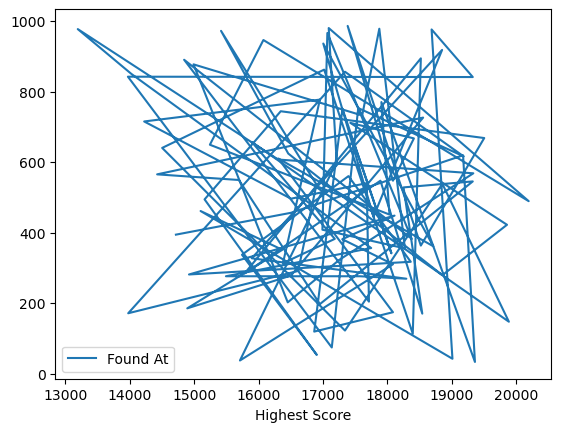

In [30]:
# Stochastic Hill Climbing Algorithm
results = pd.DataFrame()
 # randomly select one or more columns
df_sub = df.iloc[:, :7]
columns_to_select = random.sample(list(df_sub.columns), random.randint(1, 1))

# randomly select an element from each selected column
values_to_check = []
for col in columns_to_select:
    row_index = random.randint(0, len(df_sub) - 1)
    value = df_sub.loc[row_index, col]
    values_to_check.append(value)
    # print(f"Randomly selected value from column '{col}': {value}")

for i in range(100):
    # df_sub = df.iloc[:, :7]
    # parameter_to_favour = random.choice(df_sub.columns)
    # favoured_element = random.choice(df_sub[parameter_to_favour])

    # print("The favoured element \" " + str(favoured_element) + " \" is from column \" " + str(parameter_to_favour) + " \"\n")

    scores = pd.DataFrame(index=['Iteration', 'Score'])

    def objective_function(campaign):
        clicks = random.randrange(0, 40)
        impressions = random.randrange(100, 2000)
        cost = random.uniform(0, 60)
        ctr = clicks/impressions * 100
        score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100
        
        # add bonus for the keyword 'packaging design software'
        for col, value in zip(columns_to_select, values_to_check):
            if value in pd.Series(campaign[col]).values:
                score += 10000

        # if campaign.loc[parameter_to_favour] == favoured_element:
        #     score += 10000

        campaign.loc['clicks'] = clicks
        campaign.loc['impressions'] = impressions
        campaign.loc['cost'] = cost
        campaign.loc['ctr'] = ctr
        campaign.loc['score'] = score

        return campaign
    # Define the parameters to optimize
    genericDf = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/GoogleAds.xlsx')

    # convert DataFrame to sorted dictionary
    parameters = dict(sorted(genericDf.to_dict(orient='list').items()))
    # remove NaN values from dictionary
    parameters = {k: [v for v in lst if pd.notnull(v)] for k, lst in parameters.items()}

    current_solution = df.loc[1]
    current_value = current_solution.loc['score']

    # Set the step size for parameter changes
    step_size = 0.1

    # Set the number of iterations for the algorithm
    num_iterations = 1000

    iterations = 0
    highestScore = 0
    foundAt = 0

    for i in range(num_iterations):
        iterations += 1
        # new_row = pd.Series([iterations, current_solution.loc['score']], index=['Iteration', 'Score'])
        # scores = scores.append(new_row, ignore_index=True)
        
        if current_solution.loc['score'] > highestScore:
                highestScore = current_solution.loc['score']
                foundAt = iterations

        # Generate a neighbor solution by making small adjustments to one or more parameters
        neighbor_solution = current_solution.copy()
        parameters_to_change = random.sample(list(parameters.keys()), k=random.randint(1, len(parameters)))
        for parameter_to_change in parameters_to_change:
            new_value = random.choice(parameters[parameter_to_change])
            while new_value == current_solution[parameter_to_change]:
                new_value = random.choice(parameters[parameter_to_change])
            neighbor_solution[parameter_to_change] = new_value
        neighbor_value = objective_function(neighbor_solution)
        
        # print('Parameter to change: ' + parameter_to_change + '\n')

        # print(neighbor_solution)
        # print('\n')

        # If the neighbor solution is better, accept it and continue iterating
        if neighbor_value.loc['score'] > current_value:
            current_solution = neighbor_solution
            current_value = neighbor_value.loc['score']
        # If the neighbor solution is worse, accept it with a certain probability
        else:
            delta = neighbor_value.loc['score'] - current_value
            acceptance_probability = math.exp(delta / step_size)
            if random.random() < acceptance_probability:
                current_solution = neighbor_solution
                current_value = neighbor_value.loc['score']
            
    # The final solution is the locally optimal configuration of the parameters
    # print(current_solution)

    # for col, value in zip(columns_to_select, values_to_check):
    #     if value in pd.Series(current_solution[col]).values:
    #         print(f"Value {value} from column {col} is in the new DataFrame")
    #     else:
    #         print(f"Value {value} from column {col} is not in the new DataFrame")

    # print(scores)
    # scores.plot()

    new_row = pd.Series([highestScore, foundAt, len(columns_to_select)], index=['Highest Score', 'Found At', 'Amount Random'])

    # append the new row to the DataFrame
    results = results.append(new_row, ignore_index=True)

print(results)
average_iteration = results['Found At'].mean()
print("The best score is found at an average iteration of: " + str(average_iteration))

groups = results.groupby('Amount Random')

# Compute the mean of the iterations column for each group
means = groups['Found At'].mean()

# Print the resulting Series
print(means)

/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_26494/2210701502.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_26494/2210701502.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_26494/2210701502.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_26494/2210701502.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

      Iteration         Score
0           NaN           NaN
1           NaN           NaN
2           1.0    554.195584
3           2.0    554.195584
4           3.0  20269.480669
...         ...           ...
997       996.0  40678.893245
998       997.0  40678.893245
999       998.0  40678.893245
1000      999.0  40678.893245
1001     1000.0  40678.893245

[1002 rows x 2 columns]
   Highest Score  Found At  Amount Random
0   60156.681089     855.0            6.0
The best score is found at an average iteration of: 855.0
Amount Random
6.0    855.0
Name: Found At, dtype: float64


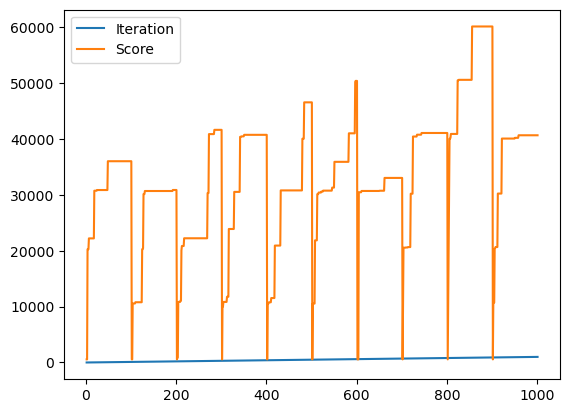

In [26]:
# Random Restart Hill Climbing Algorithm
results = pd.DataFrame()
# randomly select one or more columns
df_sub = df.iloc[:, :7]
columns_to_select = random.sample(list(df_sub.columns), random.randint(1, 7))

# randomly select an element from each selected column
values_to_check = []
for col in columns_to_select:
    row_index = random.randint(0, len(df_sub) - 1)
    value = df_sub.loc[row_index, col]
    values_to_check.append(value)
    # print(f"Randomly selected value from column '{col}': {value}")

for i in range(1):

    scores = pd.DataFrame(index=['Iteration', 'Score'])

   
    # df_sub = df.iloc[:, :7]
    # parameter_to_favour = random.choice(df_sub.columns)
    # favoured_element = random.choice(df_sub[parameter_to_favour])

    #print("The favoured element \" " + str(favoured_element) + " \" is from column \" " + str(parameter_to_favour) + " \"\n")

    def objective_function(campaign):
        clicks = random.randrange(0, 40)
        impressions = random.randrange(100, 2000)
        cost = random.uniform(0, 60)
        ctr = clicks/impressions * 100
        score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100

        # add bonus for the keyword 'packaging design software'
        for col, value in zip(columns_to_select, values_to_check):
            if value in pd.Series(campaign[col]).values:
                score += 10000

        # # add bonus for the keyword 'packaging design software'
        # if campaign.loc[parameter_to_favour] == favoured_element:
        #     score += 10000

        campaign.loc['clicks'] = clicks
        campaign.loc['impressions'] = impressions
        campaign.loc['cost'] = cost
        campaign.loc['ctr'] = ctr
        campaign.loc['score'] = score

        return campaign
    # Define the parameters to optimize
    genericDf = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/GoogleAds.xlsx')

    # convert DataFrame to sorted dictionary
    parameters = dict(sorted(genericDf.to_dict(orient='list').items()))
    # remove NaN values from dictionary
    parameters = {k: [v for v in lst if pd.notnull(v)] for k, lst in parameters.items()}

    # Set the number of iterations and random restarts for the algorithm
    num_iterations = 100
    num_restarts = 10

    # Random Restart Hill Climbing algorithm
    best_solution = None
    best_value = float('-inf')

    iterations = 0
    highestScore = 0
    foundAt = 0

    for i in range(num_restarts):
        current_solution = df.loc[0]
        current_value = current_solution.loc['score']

        for j in range(num_iterations):
            iterations += 1
            new_row = pd.Series([iterations, current_solution.loc['score']], index=['Iteration', 'Score'])
            scores = scores.append(new_row, ignore_index=True)

            if current_solution.loc['score'] > highestScore:
                highestScore = current_solution.loc['score']
                foundAt = iterations

            # Generate a neighbor solution by making small adjustments to one or more parameters
            neighbor_solution = current_solution.copy()
            parameters_to_change = random.sample(list(parameters.keys()), k=random.randint(1, len(parameters)))

            # print('Parameter to change: ' + parameter_to_change + '\n')

            for parameter_to_change in parameters_to_change:
                new_value = random.choice(parameters[parameter_to_change])
                while new_value == current_solution[parameter_to_change]:
                    new_value = random.choice(parameters[parameter_to_change])
                neighbor_solution[parameter_to_change] = new_value
            neighbor_value = objective_function(neighbor_solution)

            # print(neighbor_solution)
            # print('\n')

            # If the neighbor solution is better, accept it and continue iterating
            if neighbor_value.loc['score'] > current_value:
                current_solution = neighbor_solution
                current_value = neighbor_value.loc['score']
            
            # Update the best solution if the current solution is better
            if current_value > best_value:
                best_solution = current_solution
                best_value = current_value
            
    # print(best_solution)
    # print("Highest score is " + str(highestScore) + " found at: " + str(foundAt))

    print(scores)
    scores.plot()
    
    new_row = pd.Series([highestScore, foundAt, len(columns_to_select)], index=['Highest Score', 'Found At', 'Amount Random'])

    # append the new row to the DataFrame
    results = results.append(new_row, ignore_index=True)

print(results)
average_iteration = results['Found At'].mean()
print("The best score is found at an average iteration of: " + str(average_iteration))

groups = results.groupby('Amount Random')

# Compute the mean of the iterations column for each group
means = groups['Found At'].mean()

# Print the resulting Series
print(means)